Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 72ms/step - loss: 0.0994 - val_loss: 0.0286
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 73ms/step - loss: 0.0249 - val_loss: 0.0179
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 70ms/step - loss: 0.0175 - val_loss: 0.0148
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 74ms/step - loss: 0.0149 - val_loss: 0.0135
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 72ms/step - loss: 0.0136 - val_loss: 0.0126
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 74ms/step - loss: 0.0129 - val_loss: 0.0121
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 77ms/step - loss: 0.0124 - val_loss: 0.0117
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 74ms/step - loss: 0.0120 - val_loss: 0.0114
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 72ms/step - loss: 0.0117 - val_loss: 0.0111
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 73ms/step - loss: 0.0115 - val_loss: 0.0110
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


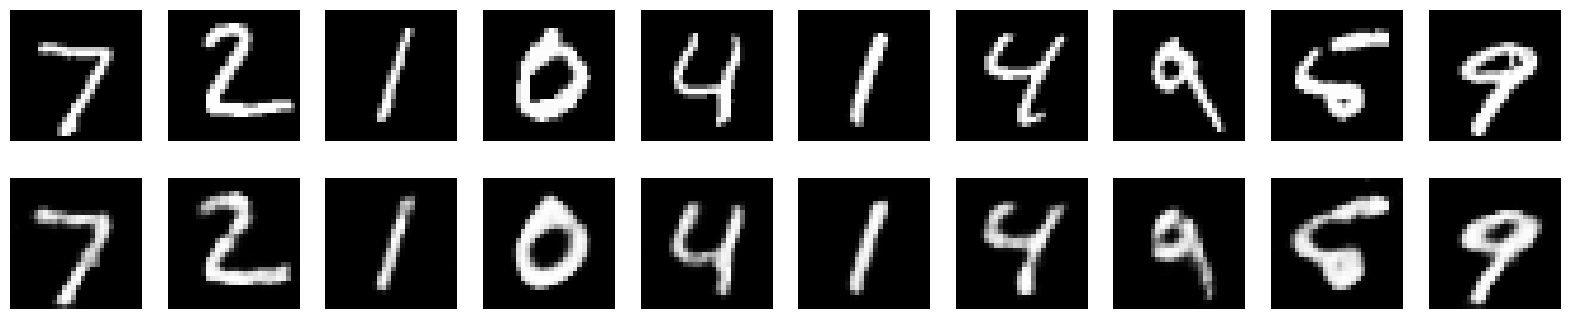

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()

# Normalize the images to [0,1] range and reshape them
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Define the Autoencoder
latent_dim = 32  # Size of compressed representation

# Encoder
encoder = keras.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(16, (3, 3), activation="relu", padding="same", strides=2),
    layers.Conv2D(8, (3, 3), activation="relu", padding="same", strides=2),
    layers.Flatten(),
    layers.Dense(latent_dim, activation="relu")
])

# Decoder
decoder = keras.Sequential([
    layers.Input(shape=(latent_dim,)),
    layers.Dense(7 * 7 * 8, activation="relu"),
    layers.Reshape((7, 7, 8)),
    layers.Conv2DTranspose(8, (3, 3), activation="relu", padding="same", strides=2),
    layers.Conv2DTranspose(16, (3, 3), activation="relu", padding="same", strides=2),
    layers.Conv2DTranspose(1, (3, 3), activation="sigmoid", padding="same")
])

# Combine Encoder and Decoder
input_img = keras.Input(shape=(28, 28, 1))
autoencoder = keras.Model(input_img, decoder(encoder(input_img)))

# Compile the Autoencoder
autoencoder.compile(optimizer="adam", loss="mse")

# Train the Autoencoder
autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, validation_data=(x_test, x_test))

# Encode and Decode test images
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# Plot original and reconstructed images
n = 10  # Number of test images to visualize
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.axis("off")

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    plt.axis("off")

plt.show()